In [1]:
from neuron import h
from Cereb_GrC_regular import Grc_regular
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subtype = 1
cell = Grc_regular(subtype)

time_step = h.CVode()
time_step.active(0) #0 fixed step, 1 variable time step

cpu = multiprocessing.cpu_count() //2
h.load_file("parcom.hoc")
p = h.ParallelComputeTool()
if cpu > 8:
    p.change_nthread(8,1)
    print('Maximum 8 threads')
else:
    p.change_nthread(cpu,1)    
    print('N° of treads', cpu)
p.multisplit(1)

TypeError: __init__() missing 1 required positional argument: 'subtype'

In [5]:
stimdata = dict()
stimdata['timeglobal'] =  2500
synapsesdata = dict()
#number of AMPA syn, NMDA syn, dend number from 0 to 3
cell.createsyn(1, 1, [0,1], [0,1])
#Mossy syn
spk_stim_mossy = []

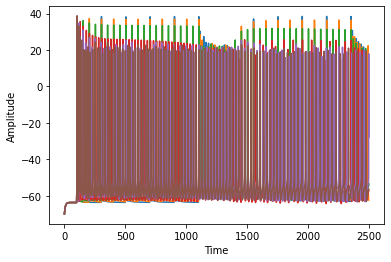

In [6]:
for protocol_name, frequency in [('step1', 200), ('step2', 100), ('step3', 50), ('step4', 25), ('step5', 16.6), ('step6', 12.5)]:
    spk_stim = h.NetStim()
    spk_stim.interval = frequency
    spk_stim.number = 1000//frequency
    spk_stim.noise = 0
    spk_stim.start = 100

    spk_stim_2 = h.NetStim()        
    spk_stim_2.interval = 10
    spk_stim_2.number = 25
    spk_stim_2.noise = 0
    spk_stim_2.start = 1100

    spk_stim_3 = h.NetStim()
    spk_stim_3.interval = frequency
    spk_stim_3.number = int(1000/frequency)
    spk_stim_3.noise = 0
    spk_stim_3.start = 1350

    spk_stim_4 = h.NetStim()        
    spk_stim_4.interval = 10
    spk_stim_4.number = 25
    spk_stim_4.noise = 0
    spk_stim_4.start = 2350        
    
    
    spk_stim_mossy.append(spk_stim)
    spk_stim_mossy.append(spk_stim_2)
    spk_stim_mossy.append(spk_stim_3)
    spk_stim_mossy.append(spk_stim_4)
    spk_nc_pfsyn = []
    spk_nc_pfsyn_nmda = []

    for m in range(int(len(spk_stim_mossy))):	
        spk_nc_pfsyn.append([h.NetCon(spk_stim_mossy[m],mossy.input,0,0.1,1) for mossy in cell.MF_GrC])
        spk_nc_pfsyn_nmda.append([h.NetCon(spk_stim_mossy[m],mossynmda.input,0,0.1,1) for mossynmda in cell.MF_GrC_mossy])

    h.dt = 0.025
    h.celsius = 32
    h.tstop = stimdata['timeglobal']
    h.v_init = -70

    def initialize():
        h.finitialize()
        h.run()
        
    initialize()

    plt.figure()
    img = plt.plot(np.array(cell.time_vector), np.array(cell.vm_soma))
    plt.xlabel("Time")
    plt.ylabel("Amplitude")